<ipython-input-4-4380b22e0559>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_distribution.index, y=type_distribution.values, palette="viridis")


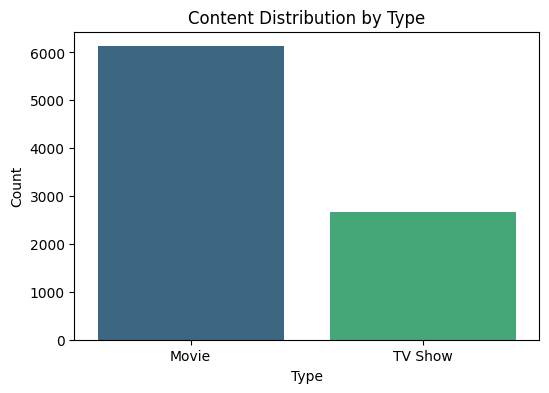

<ipython-input-4-4380b22e0559>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")


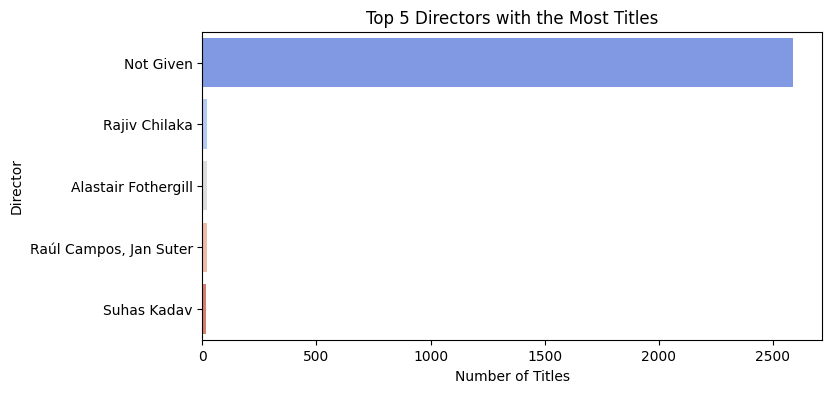

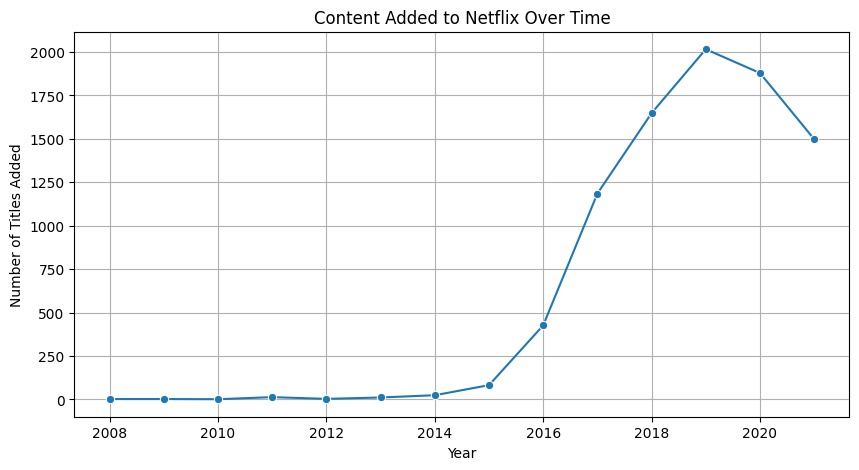

<ipython-input-4-4380b22e0559>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="Blues_d")


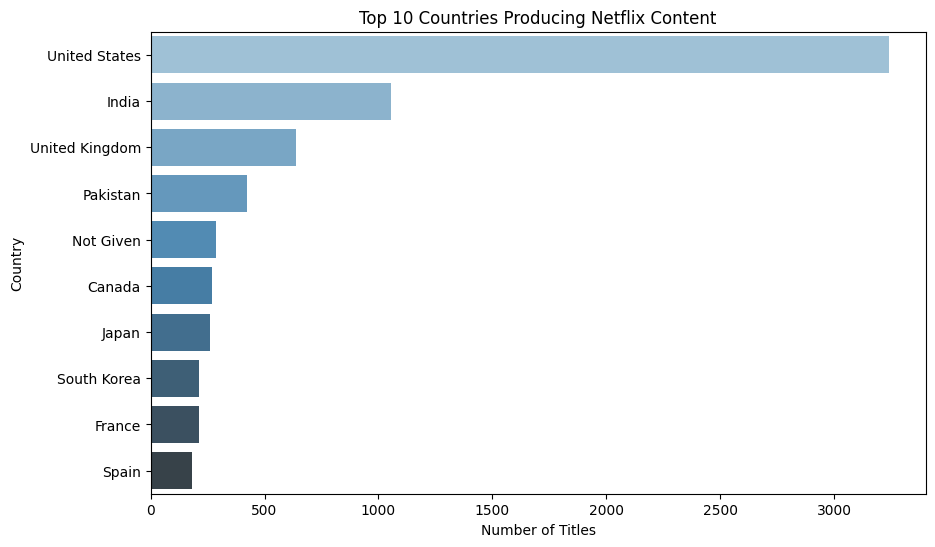

Analysis Results:
Total Entries: 8790
Unique Titles: 8787
Accuracy (%): 98.08
Top Director: Not Given
Most Common Country: United States
Most Frequent Year of Addition: 2019


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("netflix1.csv")


# In[6]:


# Clean and preprocess the data
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['duration_numeric'] = data['duration'].str.extract('(\d+)').astype(float)
data['type'] = data['type'].str.strip()


# In[7]:


# 1. Content distribution by type
type_distribution = data['type'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=type_distribution.index, y=type_distribution.values, palette="viridis")
plt.title('Content Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


# In[8]:


# 2. Most prolific directors
top_directors = data['director'].value_counts().head(5)
plt.figure(figsize=(8, 4))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")
plt.title('Top 5 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


# In[9]:


# 3. Content added over time
content_over_time = data['date_added'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=content_over_time.index, y=content_over_time.values, marker='o')
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid()
plt.show()


# In[10]:


# 4. Country-specific trends
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="Blues_d")
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


# In[11]:


# 5. Accuracy check: Content type and duration alignment
invalid_durations = data[(data['type'] == 'Movie') & (data['duration_numeric'] < 40)]
accuracy = 100 - (len(invalid_durations) / len(data) * 100)

# Display insights
analysis_results = {
    "Total Entries": len(data),
    "Unique Titles": data['title'].nunique(),
    "Accuracy (%)": round(accuracy, 2),
    "Top Director": top_directors.index[0],
    "Most Common Country": top_countries.index[0],
    "Most Frequent Year of Addition": content_over_time.idxmax(),
}

print("Analysis Results:")
for key, value in analysis_results.items():
    print(f"{key}: {value}")
